In [46]:
import pandas as pd

In [47]:
df1 = pd.read_excel('/content/sample_data/Aracaju.xlsx')
df2 = pd.read_excel('/content/sample_data/Fortaleza.xlsx')
df3 = pd.read_excel('/content/sample_data/Natal.xlsx')
df4 = pd.read_excel('/content/sample_data/Recife.xlsx')
df5 = pd.read_excel('/content/sample_data/Salvador.xlsx')

In [48]:
df = pd.concat([df1,df2,df3,df4,df5])

In [49]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [50]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [51]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [52]:
df['LojaId'] = df['LojaID'].astype('object')

In [53]:
df.dtypes.reset_index()

,index,0
0,Cidade,object
1,Data,datetime64[ns]
2,Vendas,float64
3,LojaID,int64
4,Qtde,int64
5,LojaId,object


In [54]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,LojaId
0,Aracaju,2018-01-01,142.00,1520,1,1520
1,Aracaju,2018-01-01,14.21,1522,6,1522
2,Aracaju,2018-01-01,71.55,1520,1,1520
3,Aracaju,2018-01-01,3.01,1521,7,1521
4,Aracaju,2018-01-01,24.51,1522,8,1522


In [55]:
df.isnull().sum().reset_index()

,index,0
0,Cidade,0
1,Data,0
2,Vendas,0
3,LojaID,0
4,Qtde,0
5,LojaId,0


In [56]:
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [57]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
LojaId    0
dtype: int64

In [58]:
df['Vendas'].fillna(0, inplace=True)

In [59]:
df.dropna(inplace=True)

In [60]:
df.dropna(subset=['Vendas'], inplace=True)

In [61]:
df.dropna(how='all', inplace=True)

In [62]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [63]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [64]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,LojaId,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,1520,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,1522,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,1520,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,1521,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,1522,196.08,8.0


In [65]:
df['Receita'].max()

3544.0

In [66]:
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,LojaId,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,853,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0,4.0


In [67]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,LojaId,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,1522,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,981,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,1035,4.57,1.0


In [68]:
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [69]:
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,LojaId,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,853,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,853,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,852,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,852,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,852,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,852,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,854,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,854,3112.0,4.0


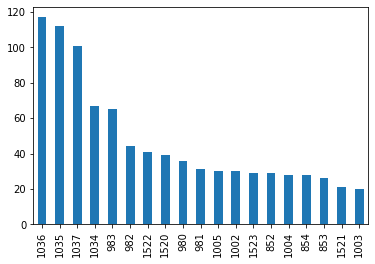

In [72]:
df['LojaID'].value_counts(ascending=False).plot.bar();

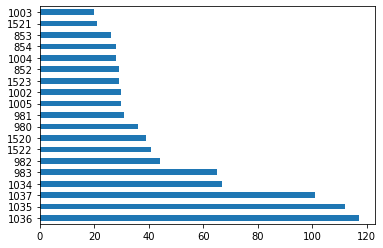

In [75]:
df['LojaID'].value_counts(ascending=False).plot.barh();

In [76]:
import matplotlib.pyplot as plt